# Model Confidence: 60px Vs 120px

### Libraries

In [1]:
%matplotlib notebook

import numpy as np # linear algebra
import os
import pickle
import matplotlib.pyplot as plt
import Lung_Segmentation as lung
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

### Normalization

In [2]:
from scipy import ndimage

def normalize(volume):
    """Normalize the volume"""
    min = -1000
    max = 400
    volume[volume < min] = min
    volume[volume > max] = max
    volume = (volume - min) / (max - min)
    volume = volume.astype("float32")
    return volume

def process_scan(image):
    """Resize volume"""
    # Normalize
    volume = normalize(image)
    
    return volume

### Load Images

In [3]:
pickle_in = open('F:\Prac_Clinicas\Images\Final_Pickle\Images_0.pickle', 'rb')
Images_0_60px = np.array(pickle.load(pickle_in))
Group_0_60px = np.array([process_scan(image) for image in Images_0_60px])
Images_0_60px = None

In [4]:
pickle_in = open('F:\Prac_Clinicas\Images\Final_Pickle\Images_1.pickle', 'rb')
Images_1_60px = np.array(pickle.load(pickle_in))
Group_1_60px = np.array([process_scan(image) for image in Images_1_60px])
Images_1_60px = None

In [5]:
pickle_in = open('F:\Prac_Clinicas\Images\Final_Pickle\Images_120px_0.pickle', 'rb')
Images_0_120px = np.array(pickle.load(pickle_in))
Group_0_120px = np.array([process_scan(image) for image in Images_0_120px])
Images_0_120px = None

In [6]:
pickle_in = open('F:\Prac_Clinicas\Images\Final_Pickle\Images_120px_1.pickle', 'rb')
Images_1_120px = np.array(pickle.load(pickle_in))
Group_1_120px = np.array([process_scan(image) for image in Images_1_120px])
Images_1_120px = None

### Load Model

In [7]:
def get_model(width=60, height=60, depth=60):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=256, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=512, activation="relu")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(units=1, activation="sigmoid")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    return model


# Build model.
model_60 = get_model(width=60, height=60, depth=60)
model_120 = get_model(width=120, height=120, depth=120)

### Get Predictions

In [41]:
# Load best weights.
model_60.load_weights("3d_image_classification.h5")
Conf_60px_0 = []
for i in range(len(Group_0_60px)):
    prediction = model_60.predict(np.expand_dims(Group_0_60px[i], axis=0))[0]
    Conf_60px_0.append(100 * (1-prediction[0]))

In [42]:
# Load best weights.
model_60.load_weights("3d_image_classification.h5")
Conf_60px_1 = []
for i in range(len(Group_1_60px)):
    prediction = model_60.predict(np.expand_dims(Group_1_60px[i], axis=0))[0]
    Conf_60px_1.append(100 * (1-prediction[0]))

In [43]:
# Load best weights.
model_120.load_weights("Nodule_Classification_120px.h5")
Conf_120px_0 = []
for i in range(len(Group_0_120px)):
    prediction = model_120.predict(np.expand_dims(Group_0_120px[i], axis=0))[0]
    Conf_120px_0.append(100 * (1-prediction[0]))

In [44]:
# Load best weights.
model_120.load_weights("Nodule_Classification_120px.h5")
Conf_120px_1 = []
for i in range(len(Group_1_120px)):
    prediction = model_120.predict(np.expand_dims(Group_1_120px[i], axis=0))[0]
    Conf_120px_1.append(100 * (1-prediction[0]))

### Graphs Comparison

<IPython.core.display.Javascript object>


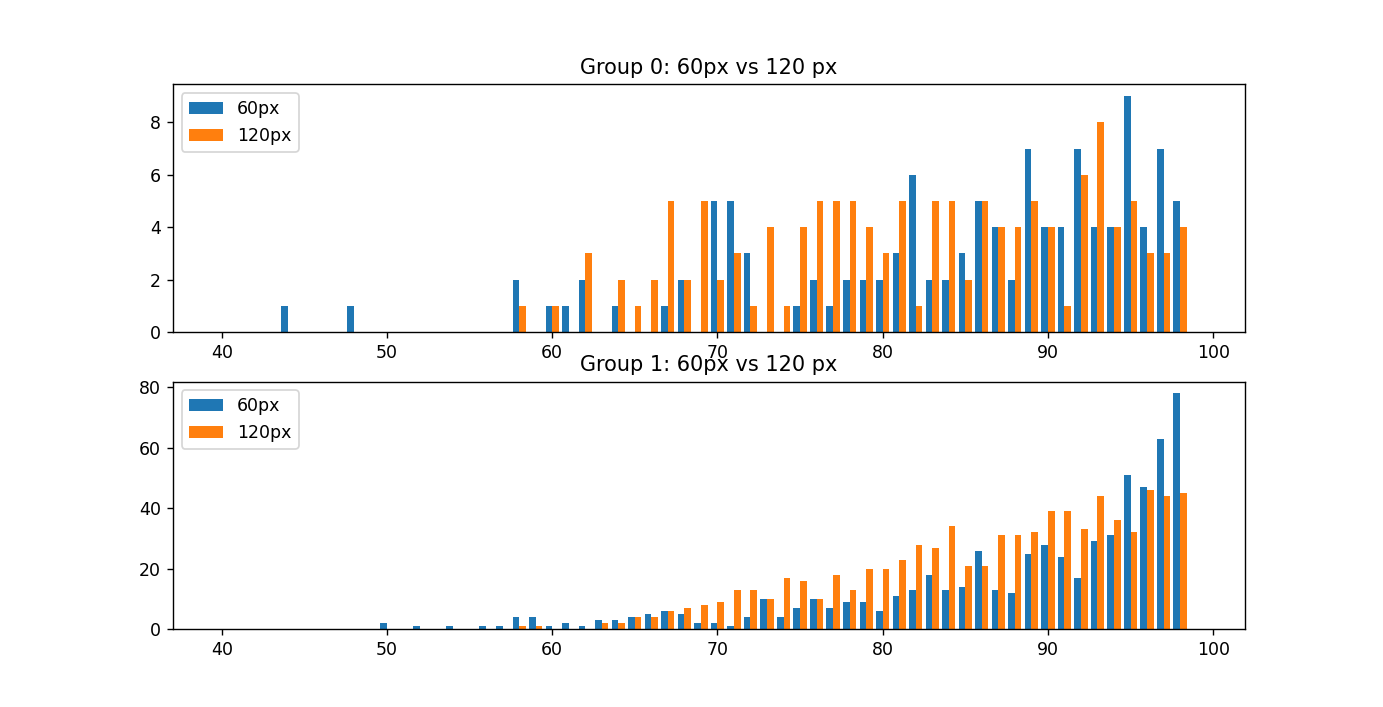

In [102]:
Confidence = np.arange(40,100,1)
plt.figure()
plt.subplot(211), plt.hist(Conf_60px_0, Confidence, width=-0.4, label='60px'), plt.hist(Conf_120px_0, Confidence, width=0.4, label='120px'), plt.title('Group 0: 60px vs 120 px')
plt.legend()
plt.subplot(212), plt.hist(Conf_60px_1, Confidence, width=-0.4, label='60px'), plt.hist(Conf_120px_1, Confidence, width=0.4, label='120px'), plt.title('Group 1: 60px vs 120 px')
plt.legend()

<IPython.core.display.Javascript object>


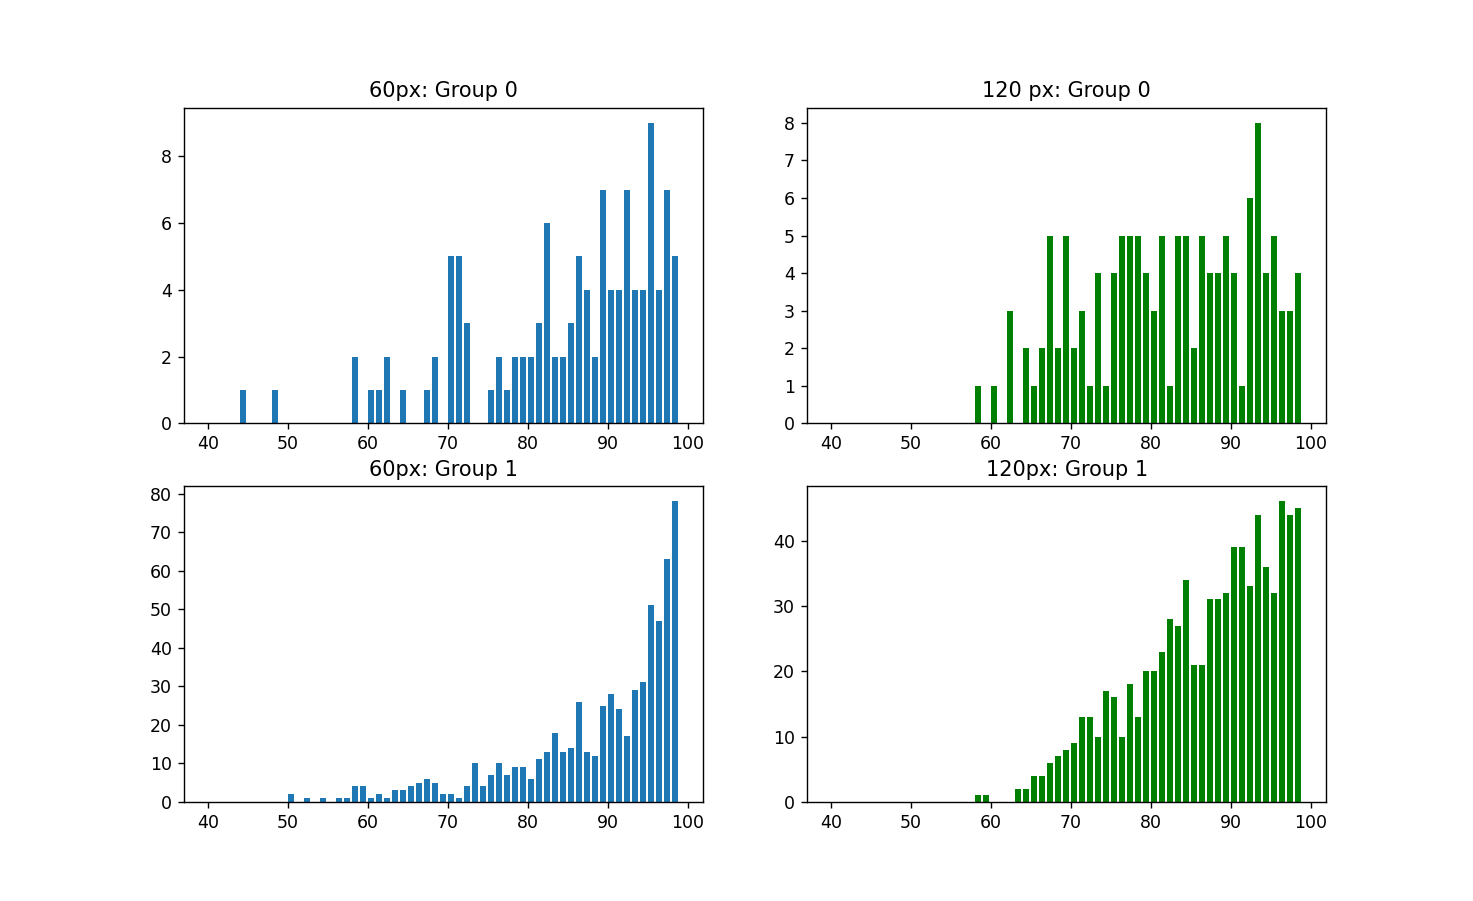

(<matplotlib.axes._subplots.AxesSubplot at 0x1b4ba329790>,
 (array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  2.,  2.,  4.,
          4.,  6.,  7.,  8.,  9., 13., 13., 10., 17., 16., 10., 18., 13.,
         20., 20., 23., 28., 27., 34., 21., 21., 31., 31., 32., 39., 39.,
         33., 44., 36., 32., 46., 44., 45.]),
  array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
         57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
         74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
         91, 92, 93, 94, 95, 96, 97, 98, 99]),
  <a list of 59 Patch objects>),
 Text(0.5, 1.0, '120px: Group 1'))

In [103]:
Confidence = np.arange(40,100,1)
plt.figure()
plt.subplot(221), plt.hist(Conf_60px_0, Confidence, width=0.8, label='60px'), plt.title('60px: Group 0')
plt.subplot(222), plt.hist(Conf_120px_0, Confidence, width=0.8, label='120px', color='g'), plt.title('120 px: Group 0')
plt.subplot(223), plt.hist(Conf_60px_1, Confidence, width=0.8, label='60px'), plt.title('60px: Group 1')
plt.subplot(224), plt.hist(Conf_120px_1, Confidence, width=0.8, label='120px', color='g'), plt.title('120px: Group 1')